<a href="https://colab.research.google.com/github/SeffySnow/GA-community-detection/blob/main/Copy_of_Graph_200_3_1_5_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Connecting to Google Drive
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing essentials

In [ ]:
#Importing Libraries
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity
import random
import numpy as np

## Creating graph with 60 nodes

In [ ]:
# Generate LFR benchmark graph
n =  200  # number of nodes
tau1 = 3
tau2 = 1.5
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10)
# saving the graph adjlist in Graph_adjlist.txt
path = '/content/drive/MyDrive/ProjectLab/GAcommunityDetection/GA_community_detection/changing nodes/graph_200_3_1.5_0.1/Graph_adjlist.txt'
nx.write_adjlist(G, path)

## Visualizing the graph

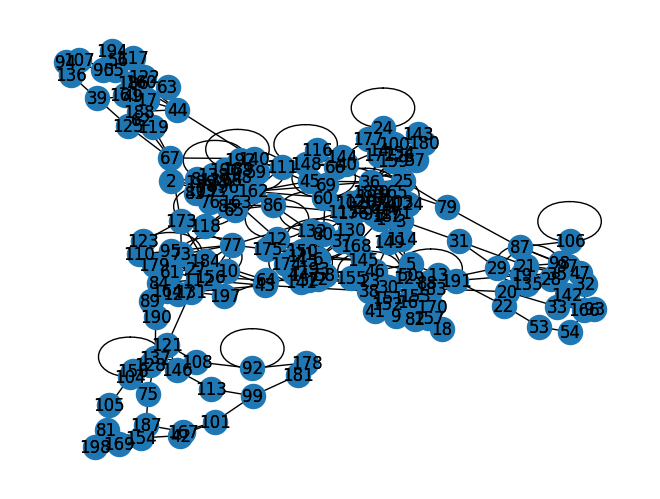

In [ ]:
#  visualize the graph G

import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_labels(G, pos)
plt.show()

In [ ]:
folder_path= '/content/drive/MyDrive/ProjectLab/GAcommunityDetection/GA_community_detection/changing nodes/graph_200_3_1.5_0.1'

## Inforamtion about the graph

### 1. Number of nodes and edges

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 200
Number of edges: 417


### 2. Communities (ground truth)

In [ ]:
import os
communities = {frozenset(G.nodes[v]["community"]) for v in G}

##Create the community file:

file_path = os.path.join(folder_path,'RealCommunities.txt')

if not os.path.exists(file_path):

    with open(file_path, 'w') as file:
        file.write(f'Ground truth communities are \n: { communities}')
    print("File created.")
else:
    print("File already exists.")

communities


File already exists.


{frozenset({5,
            9,
            13,
            16,
            18,
            23,
            30,
            38,
            41,
            46,
            50,
            82,
            88,
            129,
            149,
            151,
            152,
            153,
            157,
            170,
            183}),
 frozenset({10,
            27,
            43,
            64,
            73,
            77,
            84,
            89,
            95,
            110,
            112,
            123,
            127,
            131,
            156,
            164,
            173,
            179,
            184,
            197}),
 frozenset({0,
            1,
            3,
            7,
            34,
            51,
            60,
            70,
            74,
            91,
            102,
            103,
            114,
            115,
            120,
            124,
            126,
            130,
            165,
            17

## Defining the required functions of genetic algorithms

In [ ]:
import random
from collections import defaultdict
from random import sample


def initialize_population(pop_size, num_nodes):
    return [[random.randint(1, num_nodes) for _ in range(num_nodes)] for _ in range(pop_size)]

# Decoding each individual such that demonstrates which nodes in which community using dictionay and add it to the list of solutions : [{cluster : [nodes]}]
def decode_population(pop_arr):
    list_of_solution = []
    for individual in pop_arr:
        clusters = defaultdict(list)
        for node, cluster_id in enumerate(individual):
            clusters[cluster_id].append(node)
        list_of_solution.append(dict(clusters))
    return list_of_solution


def encoding(potential_parents ):
  encoded_potential_parents= [0] * 10
  for i,parent in enumerate(potential_parents):
      solution = parent["solution"]
      encoded_parents=[0] * num_nodes
      for community_id, nodes in solution.items():
        for node in nodes:
          encoded_parents[node] = community_id
      # print(encoded_parents)
      encoded_potential_parents[i] = encoded_parents
  return encoded_potential_parents

import numpy as np
import random

def crossover(parent1, parent2, crossover_rate):
    """Perform uniform crossover between two parents."""
    offspring = []
    for i in range(len(parent1)):
        if random.random() < crossover_rate:
            offspring.append(parent1[i])
        else:
            offspring.append(parent2[i])
    return offspring

def mutate(individual, mutation_rate):
    """Mutate an individual by changing some of its genes."""
    num_nodes = len(individual)
    genes_to_mutate = max(1, int(num_nodes * mutation_rate))
    mutation_indices = random.sample(range(num_nodes), genes_to_mutate)
    for index in mutation_indices:
        # Avoid choosing the current community
        new_community = random.choice([x for x in range(1, num_nodes + 1) if x != individual[index]])
        individual[index] = new_community
    return individual

### Defining evaluation functions:

##1. Genetic algorithm with chance of (mutation and crossover) 0.3

if chance is bigger than x , then crossover
else mutation.

x =  0.3


 mutation  rate: 0.2


 crossover rate : 0.8

In [ ]:

def genetic_algorithm_1(G, pop_size, num_generations,seed):
    random.seed(seed)
    num_nodes = len(G.nodes)
    pop_arr = initialize_population(pop_size, num_nodes)
    best_solution = None
    with open(os.path.join(folder_path,'modularity_scores1.txt'), 'w') as file:
        file.write("Starting new execution of the genetic algorithm.\n")
    elites = []
    for generation in range(num_generations):
      list_of_solution = decode_population(pop_arr)
      modularity_scores_dict = {}

      with open(os.path.join(folder_path,'modularity_scores1.txt'), 'a') as file:
        file.write(f"\n generation #{generation}: \n")

        # calculating modularity for each  individuals
        for i, individual in enumerate(list_of_solution, start=1):
            modularity_score = nx.algorithms.community.modularity(G, list(individual.values()))
            # Add modularity score to the dictionary with solution ID as key
            modularity_scores_dict[i] = modularity_score
            # Write to file
            file.write(f'Solution {i}: Modularity = {modularity_score}\n')

      # Sort the dictionary by values (modularity scores) in descending order and select top 10
      sorted_modularity_scores = sorted(modularity_scores_dict.items(), key=lambda item: item[1], reverse=True)[:10]

      potential_parents = []

      # Add the top ten solutions with their modularity scores to the potential_parents list
      for solution_id, modularity_score in sorted_modularity_scores:
          potential_parents.append({
              "id": solution_id,
              "modularity": modularity_score,
              "solution": list_of_solution[solution_id-1]  # -1 because enumerate started at 1
          })
      elites.append(dict({"Generation" : generation ,"ID" :potential_parents[0]["id"]  , "modularity":  potential_parents[0]["modularity"],"solution":potential_parents[0]['solution']   }))

      ## adding top ten solutions to the solutions.txt to check if the best solution in the potential parents is equal to the encoded solution of potential parents2
      with open(os.path.join(folder_path,'solutions1.txt'), 'a') as file:
        for i,parents in enumerate(potential_parents):
          file.write(f"Generation : {generation} \n")
          file.write(f"potential parent #{i}\n  : solution is {potential_parents[i]['solution']}\n and the modularity is  {potential_parents[i]['modularity']} \n\n")


      # mentioning the top ten parents in the text file
      with open(os.path.join(folder_path,'modularity_scores1.txt'), 'a') as file:
        file.write(f'\n 10 Selected parents are:')
        for parent in potential_parents:
            file.write(f' \n Solution {parent["id"]} with  Modularity = {parent["modularity"]}')

      best_solution = dict({"Generation": generation, "Id" : potential_parents[0]['id'], "Modularity": potential_parents[0]['modularity'], "solution": potential_parents[0]['solution']})

      # Convert potential parents to encoded form for crossover and mutation
      potential_parents2 = encoding(potential_parents)
      print(f"generation number: {generation} \n elite:  {elites[generation]['solution']}")
      # print(len(potential_parents2))
      new_population = []
      new_population.append(potential_parents2[0])
      print(f'population \t : {new_population[0]}')

      ## add the elite to the solution.txt
      with open(os.path.join(folder_path,'solutions2.txt'), 'a') as file:
        file.write(f"\n and the elite solution is : {potential_parents2[0]} \n  ")

      # Prepare for the next generation
      while len(new_population) < pop_size -1:

        chance = np.random.random()
        parent_indices = np.random.choice(range(1,len(potential_parents2)), 2, replace=False)
        parent1, parent2 = potential_parents2[parent_indices[0]], potential_parents2[parent_indices[1]]
        if chance > 0.3:
          offspring = crossover(parent1, parent2, crossover_rate=0.8)
          new_population.extend([offspring])
        else:
          offspring = mutate(parent1,0.2)
          new_population.extend([offspring])


      pop_arr = new_population



    generations = [elite['Generation'] for elite in elites]
    best_scores = [elite['modularity'] for elite in elites]
    solutions = [elite['solution'] for elite in elites]

    return  dict({'best': best_solution, "generations": generations,"best_scores": best_scores,"solutions": solutions })

In [ ]:
best_solution_1 = genetic_algorithm_1(G, 500, 50,12)
print(best_solution_1['best'])

generation number: 0 
 {49: [0, 40, 144], 137: [1, 110], 181: [2], 127: [3, 138], 168: [4], 96: [5, 109], 117: [6, 11, 52, 182], 75: [7], 156: [8], 123: [9], 105: [10, 112], 134: [12, 96], 114: [13, 126], 191: [14, 133, 168, 196], 148: [15, 64], 124: [16, 130], 37: [17, 35], 99: [18, 78], 74: [19, 62, 171], 200: [20], 150: [21], 173: [22, 156], 169: [23, 128], 147: [24, 61], 131: [25, 150, 178], 69: [26], 91: [27], 25: [28], 190: [29, 56], 125: [30, 191], 80: [31], 159: [32, 166], 145: [33, 186], 157: [34, 125, 165], 176: [36], 165: [37, 42], 18: [38, 76], 71: [39, 79, 193], 119: [41], 133: [43], 187: [44, 114], 132: [45], 53: [46, 54], 27: [47, 81], 194: [48, 189], 140: [49, 90], 51: [50], 30: [51], 128: [53], 146: [55, 187], 79: [57, 181], 177: [58, 65, 118], 92: [59, 89, 164], 138: [60, 163], 81: [63, 101, 120, 173], 40: [66], 118: [67, 161], 170: [68], 46: [69], 139: [70], 24: [71], 35: [72], 22: [73], 73: [74], 90: [75, 115], 198: [77, 169], 78: [80], 121: [82, 135], 16: [83, 88, 